In [1]:
from IPython.display import Image

# Matplotlib time series plots

In this session we will plot time series data using `Matplotlib`. This is essential to be able to visualize data extracted from satellite imagery.

We will also cover the basics of plotting.See the quick start guide here: 

https://matplotlib.org/stable/tutorials/introductory/quick_start.html

Before we begin, familiarize yourself with the image below, which describes the anatomy of a figure, according to `Matplotlib`.

Note the following terms and their associated functions, many of which we will use:

- Title
- Legend
- Ticks
- Line
- Grid
- Labels
- Axes
- Spine


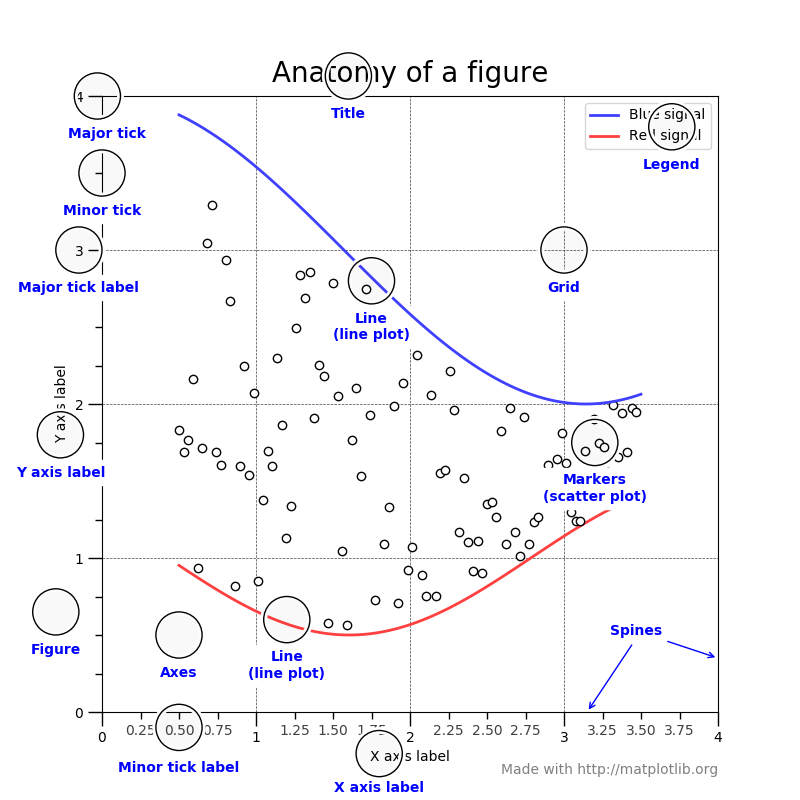

In [2]:
Image("images/anatomy_of_a_figure.png")

First, let us load the packages we need for the tutorial. 

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## The `Figure` object

The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures.

The easiest way to create a new Figure is with pyplot:

<Figure size 640x480 with 0 Axes>

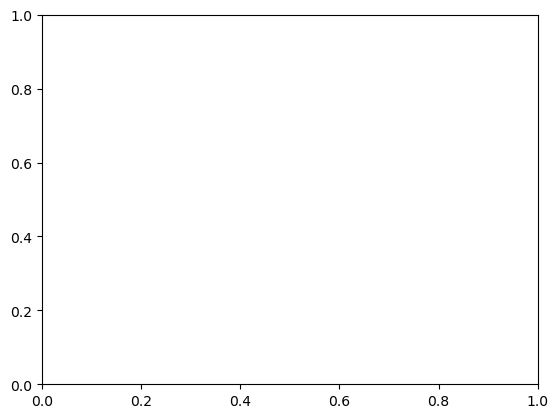

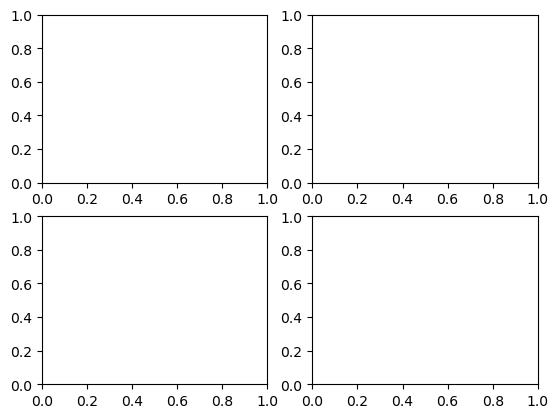

In [4]:
# Example
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axes = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

## The `Axes` object

An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. 

Each Axes also has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

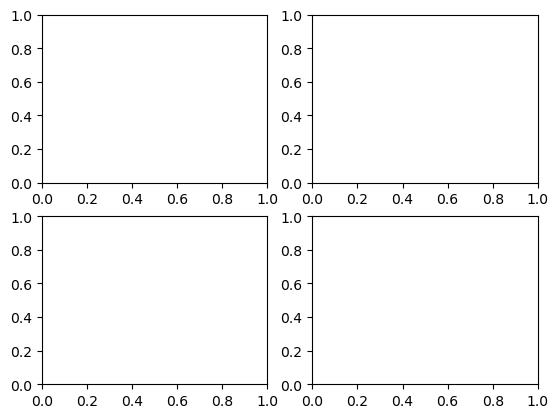

In [5]:
# Example
fig, axes = plt.subplots(2, 2)

In [6]:
# Example
print(axes)

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


In [7]:
# Example
ax1 = axes[0][0]
ax1

<AxesSubplot:>

## What is an `Artist`?

Everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). 

This includes Text objects, Line2D objects, collections objects, Patch objects, etc. 

When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

In other languages/packages, these are sometimes alternatively called 'aesthetics' (e.g., in R/Rstudio, ggplot2 etc.). 

## Data input

Plotting functions expect numpy.array or numpy.ma.masked_array as input, or objects that can be passed to numpy.asarray. Most methods will also parse an addressable object like a dict, a numpy.recarray, or a pandas.DataFrame.

Common convention is to convert data to numpy.array objects prior to plotting, but it is not always necessary, and often a pandas DataFrame will be perfectly fine. 


In [8]:
# Example
data = pd.read_csv('ndvi_data.csv')
data

,date,ndvi_1,ndvi_2
0,Sept 1st,0.80,0.82
1,Sept 15th,0.72,0.55
2,Oct 1st,0.65,0.40
3,Oct 15th,0.54,0.31
4,Nov 1st,0.38,0.21
5,Nov 15th,0.18,0.15


As we want the date on the x axis in our time series plot, we should set this as the index. 

Let us set the index, as follows:

In [9]:
# Example
data = data.set_index("date")
data

,ndvi_1,ndvi_2
date,,
Sept 1st,0.80,0.82
Sept 15th,0.72,0.55
Oct 1st,0.65,0.40
Oct 15th,0.54,0.31
Nov 1st,0.38,0.21
Nov 15th,0.18,0.15


You could use a computer recognized date format which would enable you to then organize all data in chronological order, automatically. But that is beyond our tutorial today.  

Next, let us set up the plot figure with a single axis.

We can then add our `ndvi_1` data for location A, and also `ndvi_2` data for location B.

Additionally, to differentiate the two lineplots, the marker argument is used to allocate different linepoint styles.


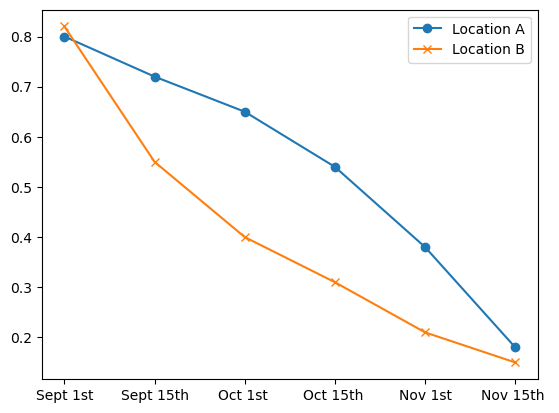

In [10]:
# Example
fig, ax = plt.subplots()

# Add the line data we want to plot, with labels and bespoke markers
plt.plot(data["ndvi_1"], label='Location A', marker='o' )
plt.plot(data["ndvi_2"], label='Location B', marker='x')
plt.legend()

Now let us finalize each axis. 

The x axis needs a label for the date. 

The y axis also needs a value label, along with setting the axis bounds (e.g. to range between 0 and 1).

Text(0, 0.5, 'Normalized Difference Vegetation Index (NDVI)')

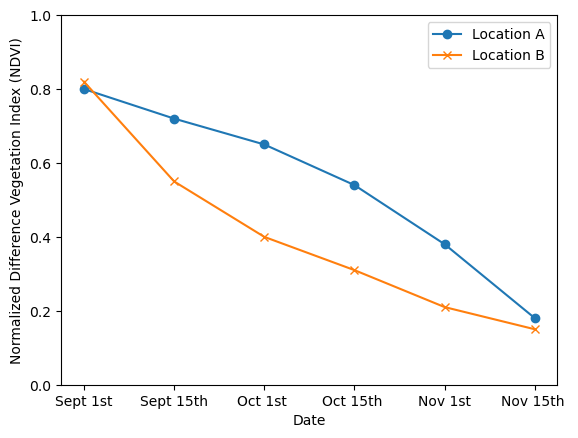

In [11]:
# Example
fig, ax = plt.subplots()

# Add the line data we want to plot, with labels and bespoke markers
plt.plot(data["ndvi_1"], label='Location A', marker='o' )
plt.plot(data["ndvi_2"], label='Location B', marker='x')
plt.legend()

# Add the axes labels and limits
plt.xlabel("Date")
plt.ylim([0, 1])
plt.ylabel("Normalized Difference Vegetation Index (NDVI)")

Finally, we can add a plot tile, as follows: 

Text(0.5, 1.0, 'NDVI Time Series Plot for Leaf Color Change in Location x and y')

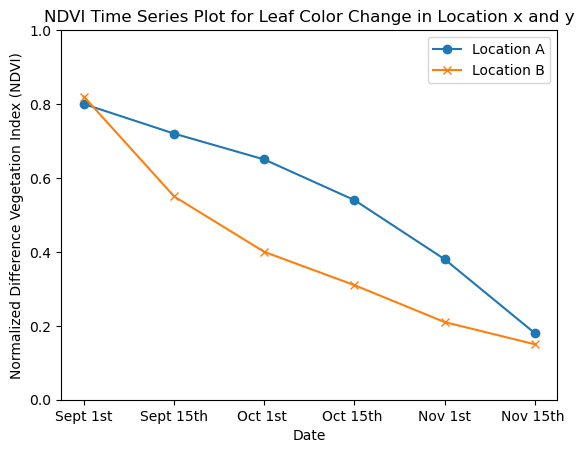

In [12]:
# Example
fig, ax = plt.subplots()

# Add the line data we want to plot, with labels and bespoke markers
plt.plot(data["ndvi_1"], label='Location A', marker='o' )
plt.plot(data["ndvi_2"], label='Location B', marker='x')
plt.legend()

# Add the axes labels and limits
plt.xlabel("Date")
plt.ylim([0, 1])
plt.ylabel("Normalized Difference Vegetation Index (NDVI)")

plt.title("NDVI Time Series Plot for Leaf Color Change in Location x and y")

If you have a long title, you can make it run over multiple lines using thr `\n` command.

When `Matplotlib` reads `\n` it will shift the title text to a new line (this one is handy, as it works across multiple languages). 

Text(0.5, 1.0, 'NDVI Time Series for Leaf Color\nChange in Location x and y')

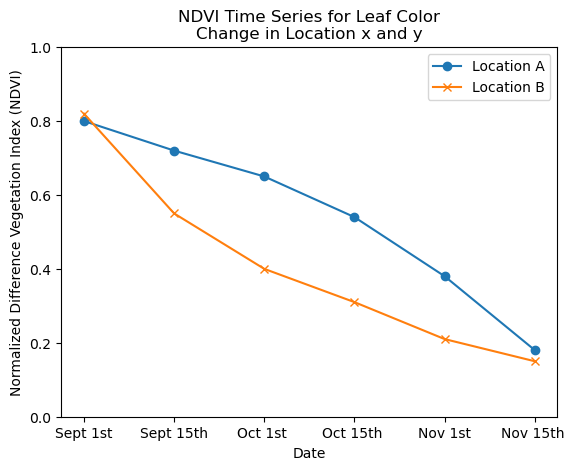

In [13]:
# Example
fig, ax = plt.subplots()

# Add the line data we want to plot, with labels and bespoke markers
plt.plot(data["ndvi_1"], label='Location A', marker='o' )
plt.plot(data["ndvi_2"], label='Location B', marker='x')
plt.legend()

# Add the axes labels and limits
plt.xlabel("Date")
plt.ylim([0, 1])
plt.ylabel("Normalized Difference Vegetation Index (NDVI)")

# Add the main plot title
plt.title("NDVI Time Series for Leaf Color\nChange in Location x and y")

Now let us export our time series plot.

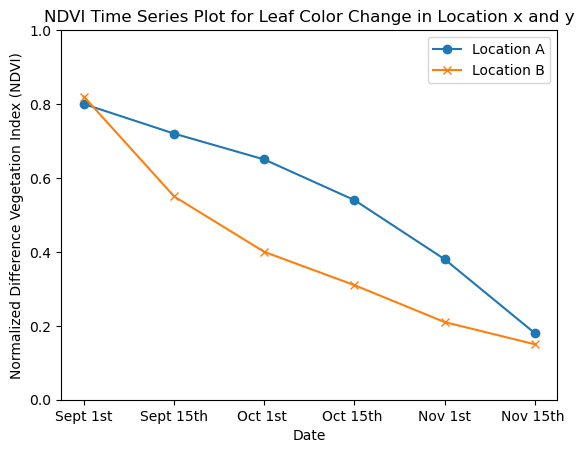

In [14]:
# Example
fig, ax = plt.subplots()

# Add the line data we want to plot, with labels and bespoke markers
plt.plot(data["ndvi_1"], label='Location A', marker='o' )
plt.plot(data["ndvi_2"], label='Location B', marker='x')
plt.legend()

# Add the axes labels and limits
plt.xlabel("Date")
plt.ylim([0, 1])
plt.ylabel("Normalized Difference Vegetation Index (NDVI)")

# Add the main plot title
plt.title("NDVI Time Series Plot for Leaf Color Change in Location x and y")

# Now export the final plot!
fig.savefig("ndvi_time_series.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

## Exercise

- Take the `plotting_exercise.csv` data and visualize.
- Create a plot that properly labels the axis and titles, for this Normalized Burn Ratio (NBR) data.
- Export the final figure. 
- Consider the relevance for visualizing extracted satellite data in your final project. 